In [1]:
#load watermark
%load_ext watermark
%watermark -a 'Gopala KR' -u -d -v -p watermark,numpy,matplotlib,nltk,sklearn,tensorflow,theano,mxnet,chainer,seaborn,keras,tflearn,bokeh,gensim

/srv/venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Using TensorFlow backend.
/srv/venv/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))


Gopala KR 
last updated: 2018-02-23 

CPython 3.6.3
IPython 6.2.1

watermark 1.6.0
numpy 1.14.1
matplotlib 2.1.2
nltk 3.2.5
sklearn 0.19.1
tensorflow 1.5.0
theano 1.0.1
mxnet 1.1.0
chainer 3.4.0
seaborn 0.8.1
keras 2.1.4
tflearn n
bokeh 0.12.14
gensim 3.3.0


/srv/venv/lib/python3.6/site-packages/scipy/sparse/sparsetools.py:20: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.io.wavfile
import IPython

def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

---

# Audio Filtering

Procedure:
    
* Read in audio
* Apply STFT (Window and FFT)
* Remove a range of frequencies we want out
* Apply Inverse STFT (to resynthesize)
* Write new audio


# Functions

In [3]:
def stft(input_data, sample_rate, window_size, hop_size):
    window = scipy.hamming(window_size)
    output = scipy.array([scipy.fft(window*input_data[i:i+window_size]) 
                         for i in range(0, len(input_data)-window_size, hop_size)])
    return output

def istft(input_data, sample_rate, window_size, hop_size, total_time):
    output = scipy.zeros(total_time*sample_rate)
    for n,i in enumerate(range(0, len(output)-window_size, hop_size)):
        output[i:i+window_size] += scipy.real(scipy.ifft(input_data[n]))
    return output



In [4]:
def low_pass_filter(max_freq, window_size, sample_rate):
    fft_bin_width = sample_rate / window_size
    max_freq_bin = max_freq / fft_bin_width
    filter_block = np.ones(window_size)
    filter_block[max_freq_bin:(window_size-max_freq_bin)] = 0
    return filter_block

def high_pass_filter(min_freq, window_size, sample_rate):
    return np.ones(window_size) - low_pass_filter(min_freq, window_size, sample_rate)

def write_audio_file(filename, filedata, sample_rate):
    scipy.io.wavfile.write(filename, sample_rate, filedata)


In [5]:
def filter_audio(input_signal, sample_rate, filter_window, window_size=256):
    # Setting parameters
    hop_size = window_size // 2
    total_time = len(input_signal) / sample_rate
    
    # Do actual filtering
    stft_output = stft(input_signal, sample_rate, window_size, hop_size)
    filtered_result = [original * filter_window for original in stft_output]
    resynth = istft(filtered_result, sample_rate, window_size, hop_size, total_time)
    
    return resynth


# Perform filtering

In [6]:
infile = "audio_files/ohm_scale.wav"
outfile = "audio_files/high_pass_out.wav"
window_size = 256

# Input
(sample_rate, input_signal) = scipy.io.wavfile.read(infile)

# Create filter window
filter_window = high_pass_filter(2500, window_size, sample_rate)

# Run filter
resynth = filter_audio(input_signal, sample_rate, filter_window, window_size)

# Output
write_audio_file(outfile, resynth, sample_rate)


/srv/venv/lib/python3.6/site-packages/scipy/io/wavfile.py:129: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = numpy.fromstring(fid.read(size), dtype=dtype)


TypeError: slice indices must be integers or None or have an __index__ method

# Results

In [7]:
#IPython.display.Audio("audio_files/ohm_scale.wav")

In [8]:
#IPython.display.Audio("audio_files/high_pass_out.wav")

## Spectrogram Before

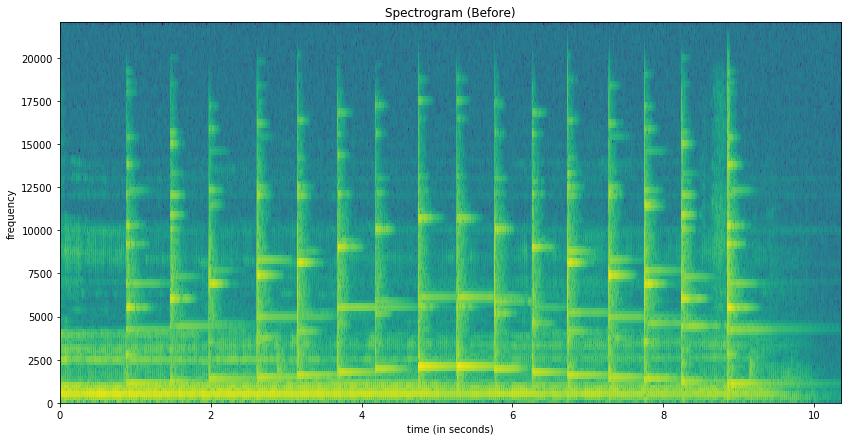

In [9]:
setup_graph(title='Spectrogram (Before)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(input_signal, Fs=sample_rate)

## Spectrogram After

NameError: name 'resynth' is not defined

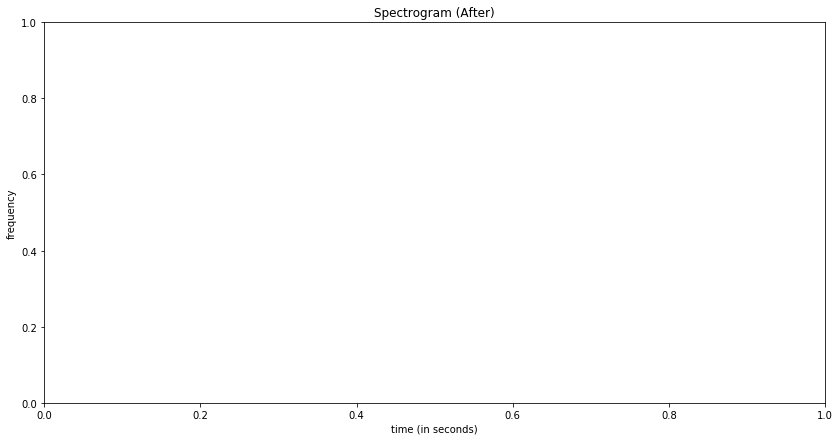

In [10]:
setup_graph(title='Spectrogram (After)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(resynth, Fs=sample_rate)

## Sound Wave Before

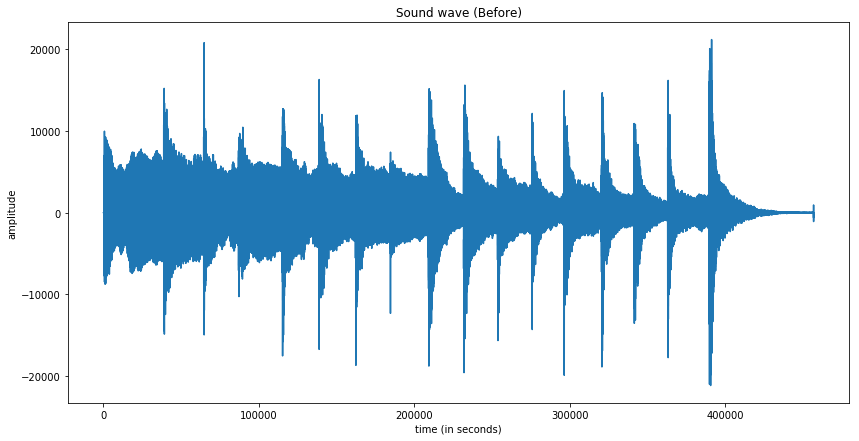

In [11]:
setup_graph(title='Sound wave (Before)', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
_ = plt.plot(input_signal)

## Sound Wave After

NameError: name 'resynth' is not defined

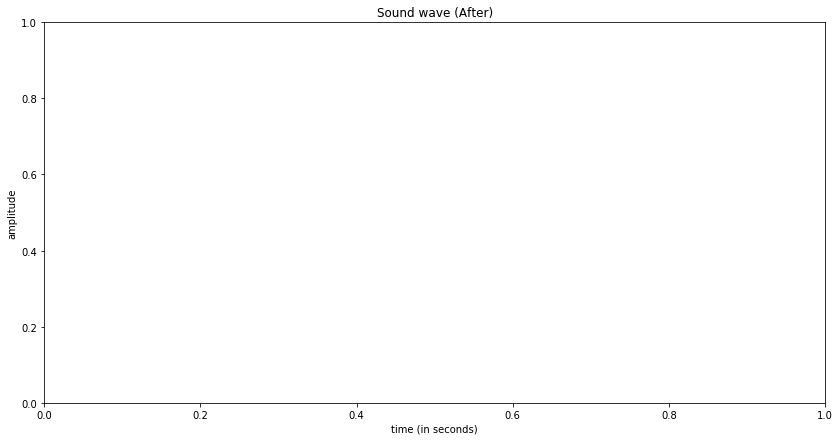

In [12]:
setup_graph(title='Sound wave (After)', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
_ = plt.plot(resynth)

# A low-pass filter example

In [13]:
infile = "audio_files/doremi_xylo.wav"
outfile = "audio_files/low_pass_out.wav"
window_size = 256

# Input
(sample_rate, input_signal) = scipy.io.wavfile.read(infile)

# Create filter window
filter_window = low_pass_filter(1700, window_size, sample_rate)

# Run filter
resynth = filter_audio(input_signal, sample_rate, filter_window, window_size)

# Output
write_audio_file(outfile, resynth, sample_rate)


/srv/venv/lib/python3.6/site-packages/scipy/io/wavfile.py:129: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = numpy.fromstring(fid.read(size), dtype=dtype)


TypeError: slice indices must be integers or None or have an __index__ method

In [14]:
#IPython.display.Audio("audio_files/doremi_xylo.wav")

In [15]:
#IPython.display.Audio("audio_files/low_pass_out.wav")

### Notice that in the after example, you can hear the xylophone mallet, but not the keys

In [16]:
del input_signal, filter_window, resynth, _

NameError: name 'filter_window' is not defined